<a href="https://colab.research.google.com/github/THUVAARAGAN/3D-point-cloud-compression-using-graph-transform/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data preprocessing and Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df_breast= pd.read_csv("/content/drive/MyDrive/competition/kaggle/train.csv")
df_breast.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [ ]:
df_Positive = df_breast[df_breast["difficult_negative_case"]== True]
df_Positive.shape

(7705, 14)

In [ ]:
df_Positive.to_csv('df_Positive.csv', index = False)

In [ ]:
df_negative = df_breast[df_breast["difficult_negative_case"]== False]
df_negative.shape

(47001, 14)

In [ ]:
df_negative.to_csv('df_negative.csv', index = False)

In [ ]:
df_brest_encoded.to_csv('df_brest_encoded.csv', index = False)

In [ ]:
df_10442 = df_breast[df_breast["patient_id"]== 10442]
df_10042 = df_breast[df_breast["patient_id"]== 10042]

In [ ]:
result = pd.concat([df_10442 , df_10042])
result

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
425,1,10442,342203223,L,MLO,71.0,0,1,0,0.0,0,B,93,True
426,1,10442,604882069,L,CC,71.0,0,1,0,0.0,0,B,93,True
427,1,10442,1119390120,L,MLO,71.0,0,1,0,0.0,0,B,93,True
428,1,10442,1605097365,L,MLO,71.0,0,1,0,0.0,0,B,93,True
429,1,10442,1755756186,L,MLO,71.0,0,1,0,0.0,0,B,93,True
430,1,10442,506148695,R,CC,71.0,0,0,0,NaN,0,B,93,False
431,1,10442,560290012,R,CC,71.0,0,0,0,NaN,0,B,93,False
432,1,10442,652344784,R,MLO,71.0,0,0,0,NaN,0,B,93,False
433,1,10442,1833418626,R,MLO,71.0,0,0,0,NaN,0,B,93,False
434,1,10442,1962451444,R,MLO,71.0,0,0,0,NaN,0,B,93,False


In [ ]:
result.to_csv('df_brest_Niro.csv', index = False)

In [ ]:
print(df_breast['site_id'].unique())
print(df_breast['cancer'].unique())
print(df_breast['biopsy'].unique())
print(df_breast['invasive'].unique())
print(df_breast['BIRADS'].unique())
print(df_breast['implant'].unique())
print(df_breast['density'].unique())
print(df_breast['difficult_negative_case'].unique())


[2 1]
[0 1]
[0 1]
[0 1]
[nan  0.  1.  2.]
[0 1]
[nan 'C' 'D' 'B' 'A']
[False  True]


In [ ]:
site_id_list = df_breast["site_id"].tolist()
patient_id_list = df_breast["patient_id"].tolist()
image_id_list = df_breast["image_id"].tolist()
laterality_list = df_breast["laterality"].tolist()
view_list = df_breast["view"].tolist()
age_list = df_breast["age"].tolist()
cancer_list = df_breast["cancer"].tolist()
biopsy_list = df_breast["biopsy"].tolist()
invasive_list = df_breast["invasive"].tolist()
BIRADS_list = df_breast["BIRADS"].tolist()
implant_list = df_breast["implant"].tolist()
density_list = df_breast["density"].tolist()
machine_id_list = df_breast["machine_id"].tolist()
difficult_negative_case_list = df_breast["difficult_negative_case"].tolist()

##Extact features

In [ ]:
laterality_list_numeric = []
for i in range(df_breast.shape[0]):
  if laterality_list[i] == 'L':
    laterality_list_numeric.append(0)
  else:
    laterality_list_numeric.append(1)

In [ ]:
view_list_numeric = []
for i in range(df_breast.shape[0]):
  if view_list[i] == 'CC':
    view_list_numeric.append(0)
  else:
    view_list_numeric.append(1)

In [ ]:
age_1_list_numeric = []
for i in range(df_breast.shape[0]):
  if (age_list[i] > 51) and (age_list[i] < 70):
    age_1_list_numeric.append(1)
  else:
    age_1_list_numeric.append(0)

In [ ]:
age_2_list_numeric = []
for i in range(df_breast.shape[0]):
  if (age_list[i] < 51) and (age_list[i] > 45):
    age_2_list_numeric.append(1)
  else:
    age_2_list_numeric.append(0)

In [ ]:
age_3_list_numeric = []
for i in range(df_breast.shape[0]):
  if ((age_list[i] < 45) and (age_list[i] > 38) | (age_list[i] < 76) and (age_list[i] > 70)) :
    age_3_list_numeric.append(1)
  else:
    age_3_list_numeric.append(0)

In [ ]:
age_4_list_numeric = []
for i in range(df_breast.shape[0]):
  if (age_list[i] < 83) and (age_list[i] > 76):
    age_4_list_numeric.append(1)
  else:
    age_4_list_numeric.append(0)

In [ ]:
age_5_list_numeric = []
for i in range(df_breast.shape[0]):
  if (age_list[i] > 83) | (age_list[i] < 38):
    age_5_list_numeric.append(1)
  else:
    age_5_list_numeric.append(0)

In [ ]:
import numpy as np
BIRADS_list_numeric = []
for i in range(df_breast.shape[0]):
  if BIRADS_list[i] == 0.0:
    BIRADS_list_numeric.append(BIRADS_list[i])
  elif BIRADS_list[i] == 1.0:
    BIRADS_list_numeric.append(BIRADS_list[i])
  elif BIRADS_list[i] == 2.0:
    BIRADS_list_numeric.append(BIRADS_list[i])
  else:
    BIRADS_list_numeric.append(999)

In [ ]:
import numpy as np
density_1_list_numeric = []
for i in range(df_breast.shape[0]):
  if (density_list[i] != "A") or (density_list[i] != "B") or (density_list[i] != "C") or (density_list[i] != "D"):
    density_1_list_numeric.append(999)
  else:
    density_1_list_numeric.append(0)

In [ ]:
import numpy as np
density_2_list_numeric = []
for i in range(df_breast.shape[0]):
  if density_list[i] == "A":
    density_2_list_numeric.append(1)
  else:
    density_2_list_numeric.append(0)

In [ ]:
import numpy as np
density_3_list_numeric = []
for i in range(df_breast.shape[0]):
  if density_list[i] == "B":
    density_3_list_numeric.append(1)
  else:
    density_3_list_numeric.append(0)

In [ ]:
import numpy as np
density_4_list_numeric = []
for i in range(df_breast.shape[0]):
  if density_list[i] == "C":
    density_4_list_numeric.append(1)
  else:
    density_4_list_numeric.append(0)

In [ ]:
import numpy as np
density_5_list_numeric = []
for i in range(df_breast.shape[0]):
  if density_list[i] == "D":
    density_5_list_numeric.append(1)
  else:
    density_5_list_numeric.append(0)

In [ ]:
difficult_negative_case_list_numeric = []
for i in range(df_breast.shape[0]):
  if difficult_negative_case_list[i] == True:
    difficult_negative_case_list_numeric.append(1)
  else:
    difficult_negative_case_list_numeric.append(0)

##Create new data frame

In [ ]:
print(len(site_id_list))
print(len(patient_id_list))
print(len(image_id_list))
print(len(laterality_list_numeric))
print(len(view_list_numeric))
print(len(age_1_list_numeric))
print(len(age_2_list_numeric))
print(len(age_3_list_numeric))
print(len(age_4_list_numeric))
print(len(age_5_list_numeric))
print(len(cancer_list))
print(len(biopsy_list))
print(len(invasive_list))
print(len(BIRADS_list_numeric))
print(len(implant_list))
print(len(density_1_list_numeric))
print(len(density_2_list_numeric))
print(len(density_3_list_numeric))
print(len(density_4_list_numeric))
print(len(density_5_list_numeric))
print(len(machine_id_list))
print(len(difficult_negative_case_list_numeric))

54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706
54706


In [ ]:
import pandas as pd
features = {
    'site_id':site_id_list,
    'patient_id' :patient_id_list,
    'image_id':image_id_list,
    'laterality':laterality_list_numeric,
    'view':view_list_numeric,
    'age_1' :age_1_list_numeric,
    'age_2':age_2_list_numeric,
    'age_3':age_3_list_numeric,
    'age_4':age_4_list_numeric,
    'age_5':age_5_list_numeric,
    'cancer':cancer_list,
    'biopsy':biopsy_list,
    'invasive':invasive_list,
    'BIRADS' :BIRADS_list_numeric,
    'implant':implant_list,
    'density_1':density_1_list_numeric,
    'density_2':density_2_list_numeric,
    'density_3':density_3_list_numeric,
    'density_4':density_4_list_numeric,
    'density_5':density_5_list_numeric,
    'machine_id':machine_id_list,
    'difficult_negative_case':difficult_negative_case_list_numeric
              }
df_brest_encoded = pd.DataFrame(features)
df_brest_encoded.head(10)

,site_id,patient_id,image_id,laterality,view,age_1,age_2,age_3,age_4,age_5,...,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5,machine_id,difficult_negative_case
0,2,10006,462822612,0,0,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
1,2,10006,1459541791,0,1,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
2,2,10006,1864590858,1,1,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
3,2,10006,1874946579,1,0,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
4,2,10011,220375232,0,0,1,0,0,0,0,...,0,0.0,0,999,0,0,0,0,21,1
5,2,10011,270344397,0,1,1,0,0,0,0,...,0,0.0,0,999,0,0,0,0,21,1
6,2,10011,541722628,1,0,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,21,0
7,2,10011,1031443799,1,1,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,21,0
8,2,10025,562340703,0,0,0,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
9,2,10025,1365269360,0,1,0,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0


In [ ]:
df_brest_encoded.to_csv('df_brest_encoded.csv', index = False)

In [ ]:
df_breast.shape

(54706, 14)

In [ ]:
df_brest_encoded.shape

(54706, 22)

In [ ]:
df_positive = df_brest_encoded[df_brest_encoded["difficult_negative_case"]== 1]
df_positive.head()

,site_id,patient_id,image_id,laterality,view,age_1,age_2,age_3,age_4,age_5,...,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5,machine_id,difficult_negative_case
4,2,10011,220375232,0,0,1,0,0,0,0,...,0,0.0,0,999,0,0,0,0,21,1
5,2,10011,270344397,0,1,1,0,0,0,0,...,0,0.0,0,999,0,0,0,0,21,1
28,1,10049,94335194,1,1,1,0,0,0,0,...,0,0.0,0,999,0,0,1,0,49,1
29,1,10049,1207499426,1,1,1,0,0,0,0,...,0,0.0,0,999,0,0,1,0,49,1
30,1,10049,1351270472,1,0,1,0,0,0,0,...,0,0.0,0,999,0,0,1,0,49,1


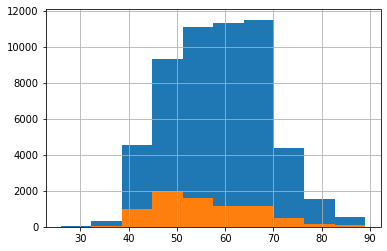

In [ ]:
df_breast_Age = df_breast.loc[:,"age"]
df_breast_Age.hist()
df_breast_Age_positive = df_breast[df_breast["difficult_negative_case"]== True].loc[:,"age"]
df_breast_Age_positive.hist()

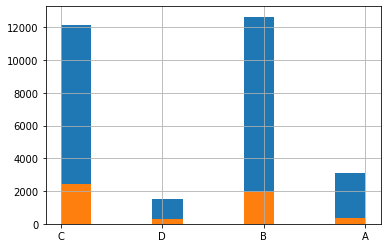

In [ ]:
df_breast_Age = df_breast.loc[:,"density"]
df_breast_Age.hist()
df_breast_Age_positive = df_breast[df_breast["difficult_negative_case"]== True].loc[:,"density"]
df_breast_Age_positive.hist()

In [ ]:
df_breast.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [ ]:
patient_unique = df_breast["patient_id"].unique()
len(patient_unique)

11913

In [ ]:
for i in range(80,100):
  print(patient_unique[i])


10401
10404
10406
10407
10412
10413
10424
10426
10428
10429
10432
10434
10438
10439
10442
10445
1045
10468
10478
10483


In [ ]:
df_breast[df_breast["patient_id"]==10006].shape[0]

4

In [ ]:
three_image_patient = []
four_image_patient = []
five_image_patient = []
six_image_patient = []
seven_image_patient = []
eight_image_patient = []
nine_image_patient = []
ten_image_patient = []
other = []
for i in patient_unique:
  if df_breast[df_breast["patient_id"]==i].shape[0] == 3:
    three_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 4:
    four_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 5:
    five_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 6:
    six_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 7:
    seven_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 8:
    eight_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 9:
    nine_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] == 10:
    ten_image_patient.append(i)
  if df_breast[df_breast["patient_id"]==i].shape[0] > 10:
    other.append(i)





In [ ]:
print("three_image_patient=" , len(three_image_patient))
print("four_image_patient=" , len(four_image_patient))
print("five_image_patient=" , len(five_image_patient))
print("six_image_patient=" , len(six_image_patient))
print("seven_image_patient=" , len(seven_image_patient))
print("eight_image_patient=" , len(eight_image_patient))
print("nine_image_patient=" , len(nine_image_patient))
print("ten_image_patient=" , len(ten_image_patient))
print("other_image_patient=" , len(other))

three_image_patient= 0
four_image_patient= 8233
five_image_patient= 1767
six_image_patient= 1218
seven_image_patient= 276
eight_image_patient= 229
nine_image_patient= 99
ten_image_patient= 53
other_image_patient= 38


In [ ]:
df_breast[df_breast["patient_id"]==other[0]]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
425,1,10442,342203223,L,MLO,71.0,0,1,0,0.0,0,B,93,True
426,1,10442,604882069,L,CC,71.0,0,1,0,0.0,0,B,93,True
427,1,10442,1119390120,L,MLO,71.0,0,1,0,0.0,0,B,93,True
428,1,10442,1605097365,L,MLO,71.0,0,1,0,0.0,0,B,93,True
429,1,10442,1755756186,L,MLO,71.0,0,1,0,0.0,0,B,93,True
430,1,10442,506148695,R,CC,71.0,0,0,0,NaN,0,B,93,False
431,1,10442,560290012,R,CC,71.0,0,0,0,NaN,0,B,93,False
432,1,10442,652344784,R,MLO,71.0,0,0,0,NaN,0,B,93,False
433,1,10442,1833418626,R,MLO,71.0,0,0,0,NaN,0,B,93,False
434,1,10442,1962451444,R,MLO,71.0,0,0,0,NaN,0,B,93,False


##Remove the Duplicated Rows

In [ ]:
removed = df_breast.drop(columns=["image_id"])

In [ ]:
df2 = removed.drop_duplicates(keep='first')
df2.head()

,site_id,patient_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [ ]:
df2.shape

(47689, 13)

In [ ]:
Duplicated_rows = df_breast.duplicated(subset=['difficult_negative_case','machine_id','density','age','view','laterality','patient_id'])
Duplicated_rows.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
df_breast_remove_duplicates = df_breast.drop_duplicates(df_breast.columns)
df_breast_remove_duplicates.head()
# subset = ['difficult_negative_case','machine_id','density','age','view','laterality','patient_id','site_id','cancer','biopsy','invasive','BIRADS','implant']

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [ ]:
df_breast.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

In [ ]:
df_breast_remove_duplicates.shape

(54706, 14)

In [ ]:
df_breast_remove_duplicates['patient_id'].unique().shape

(11913,)

In [ ]:
four_image_patient = []
other = []
for i in patient_unique:
  if df_breast[df_breast["patient_id"]==i].shape[0] == 4:
    four_image_patient.append(i)
  else:
    other.append(i)

In [ ]:
print("four_image_patient=" , len(four_image_patient))
print("other_image_patient=" , len(other))

four_image_patient= 8233
other_image_patient= 3680


In [ ]:
df_breast[df_breast["patient_id"]==other[1]]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
25,1,10049,349510516,L,CC,52.0,0,0,0,NaN,0,C,49,False
26,1,10049,906829939,L,MLO,52.0,0,0,0,NaN,0,C,49,False
27,1,10049,1464813991,L,MLO,52.0,0,0,0,NaN,0,C,49,False
28,1,10049,94335194,R,MLO,52.0,0,0,0,0.0,0,C,49,True
29,1,10049,1207499426,R,MLO,52.0,0,0,0,0.0,0,C,49,True
30,1,10049,1351270472,R,CC,52.0,0,0,0,0.0,0,C,49,True


In [ ]:
df_breast.shape

(54706, 14)

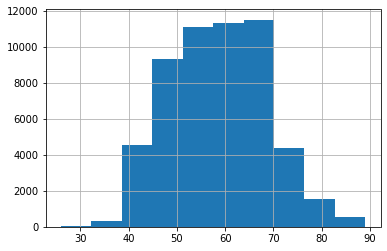

In [ ]:
df_breast_Age = df_breast.loc[:,"age"]
df_breast_Age.hist()

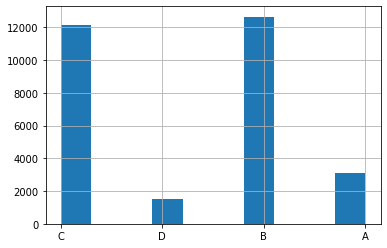

In [ ]:
df_breast_Age = df_breast.loc[:,"density"]
df_breast_Age.hist()

In [ ]:
df_breast_difficult_negative_case = df_breast.loc[:,"difficult_negative_case"]
# y = pd.get_dummies(df_breast_difficult_negative_case.difficult_negative_case, prefix='Cancer')
df_breast_difficult_negative_case.head()

0    False
1    False
2    False
3    False
4     True
Name: difficult_negative_case, dtype: bool

In [ ]:
df_breast_Positive = df_breast[df_breast["difficult_negative_case"] == True ]
df_breast_Positive.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
28,1,10049,94335194,R,MLO,52.0,0,0,0,0.0,0,C,49,True
29,1,10049,1207499426,R,MLO,52.0,0,0,0,0.0,0,C,49,True
30,1,10049,1351270472,R,CC,52.0,0,0,0,0.0,0,C,49,True


we can see some doplicate rows here raw no 28 and 29 are same row image id is changed.

In [ ]:
df_breast_Positive.shape

(7705, 14)

## data processing

In [ ]:
df_brest_encoded.head()

,site_id,patient_id,image_id,laterality,view,age_1,age_2,age_3,age_4,age_5,...,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5,machine_id,difficult_negative_case
0,2,10006,462822612,0,0,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
1,2,10006,1459541791,0,1,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
2,2,10006,1864590858,1,1,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
3,2,10006,1874946579,1,0,1,0,0,0,0,...,0,999.0,0,999,0,0,0,0,29,0
4,2,10011,220375232,0,0,1,0,0,0,0,...,0,0.0,0,999,0,0,0,0,21,1


In [ ]:
df_brest_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  int64  
 4   view                     54706 non-null  int64  
 5   age_1                    54706 non-null  int64  
 6   age_2                    54706 non-null  int64  
 7   age_3                    54706 non-null  int64  
 8   age_4                    54706 non-null  int64  
 9   age_5                    54706 non-null  int64  
 10  cancer                   54706 non-null  int64  
 11  biopsy                   54706 non-null  int64  
 12  invasive                 54706 non-null  int64  
 13  BIRADS                   54706 non-null  float64
 14  implant               

In [ ]:
df_brest_encoded.describe()

,site_id,patient_id,image_id,laterality,view,age_1,age_2,age_3,age_4,age_5,...,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5,machine_id,difficult_negative_case
count,54706.000000,54706.000000,5.470600e+04,54706.000000,54706.000000,54706.000000,54706.000000,54706.0,54706.000000,54706.000000,...,54706.000000,54706.000000,54706.000000,54706.0,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,0.501572,0.510748,0.601122,0.121998,0.0,0.027968,0.012302,...,0.014953,519.355866,0.026999,999.0,0.056758,0.231254,0.222553,0.028132,54.618378,0.140844
std,0.498434,18893.861534,6.183269e+08,0.500002,0.499889,0.489672,0.327286,0.0,0.164882,0.110232,...,0.121365,498.738664,0.162081,0.0,0.231382,0.421638,0.415965,0.165352,44.784800,0.347864
min,1.000000,5.000000,6.849100e+04,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,999.0,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,16481.000000,5.458153e+08,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,1.000000,0.000000,999.0,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
50%,1.000000,32432.000000,1.082689e+09,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,999.000000,0.000000,999.0,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000
75%,2.000000,48999.000000,1.613228e+09,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,999.000000,0.000000,999.0,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000
max,2.000000,65534.000000,2.147472e+09,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,999.000000,1.000000,999.0,1.000000,1.000000,1.000000,1.000000,216.000000,1.000000


In [ ]:
y=df_brest_encoded.difficult_negative_case
x = df_brest_encoded.iloc[:,3:-2]

In [ ]:
x.head()

,laterality,view,age_1,age_2,age_3,age_4,age_5,cancer,biopsy,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5
0,0,0,1,0,0,0,0,0,0,0,999.0,0,999,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,999.0,0,999,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,999.0,0,999,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,999.0,0,999,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0.0,0,999,0,0,0,0


In [ ]:
x.shape

(54706, 17)

In [ ]:
y

0        0
1        0
2        0
3        0
4        1
        ..
54701    0
54702    0
54703    0
54704    1
54705    1
Name: difficult_negative_case, Length: 54706, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(max_features=1,n_estimators = 15, criterion = 'gini', random_state = 4)
classifier7.fit(X_train, Y_train)

RandomForestClassifier(max_features=1, n_estimators=15, random_state=4)

In [ ]:
Y_pred7 = classifier7.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(Y_test, Y_pred7))

0.9999390689739215


In [ ]:
from sklearn.metrics import confusion_matrix
#confusuon matrix for randomforest
pd.crosstab(Y_test, Y_pred7)

col_0,0,1
difficult_negative_case,,
0,14087,0
1,1,2324


In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.9364489398001462
0.9973799658786254
0.9371801121130879
0.858335364367536
0.6777967340970021
1.0


## MLP

In [ ]:
import random
import os
import tensorflow as tf

random.seed(1234)
tf.compat.v1.random.set_random_seed(1234)
os.environ['PYTHONHASHSEED'] = str(1234)
np.random.seed(1234)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 133)               2394      
                                                                 
 flatten_4 (Flatten)         (None, 133)               0         
                                                                 
 dense_15 (Dense)            (None, 90)                12060     
                                                                 
 dropout_4 (Dropout)         (None, 90)                0         
                                                                 
 dense_16 (Dense)            (None, 30)                2730      
                                                                 
Total params: 17,184
Trainable params: 17,184
Non-trainable params: 0
_________________________________________________________________
None


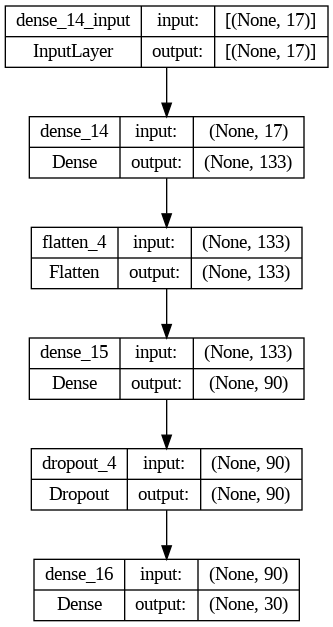

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense

# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.layers import Dense,Dropout,Flatten,InputLayer
from tensorflow.keras.utils import plot_model

# create model
model = Sequential()
model.add(Dense(133, input_shape=(17,), activation='relu'))
model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))

print(model.summary())
plot_model(model,show_shapes = True ,show_layer_names = True)

In [ ]:
Train_Feature_data = x.iloc[:45001,:]
Test_Feature_data = x.iloc[45001:,:]
Train_label_data = y.iloc[:45001]
Test_label_data = y.iloc[45001:]

In [ ]:
Test_Feature_data.tail()

44996    0
44997    0
44998    0
44999    0
45000    0
Name: difficult_negative_case, dtype: int64

In [ ]:
Train_Feature_data.tail()

,laterality,view,age_1,age_2,age_3,age_4,age_5,cancer,biopsy,invasive,BIRADS,implant,density_1,density_2,density_3,density_4,density_5
44996,1,1,0,0,0,0,0,0,0,0,1.0,0,999,0,1,0,0
44997,1,0,0,0,0,0,0,0,0,0,1.0,0,999,0,1,0,0
44998,0,1,1,0,0,0,0,0,0,0,999.0,0,999,0,1,0,0
44999,0,0,1,0,0,0,0,0,0,0,999.0,0,999,0,1,0,0
45000,1,1,1,0,0,0,0,0,0,0,2.0,0,999,0,1,0,0


In [ ]:
Train_Feature_data_list = list(Train_Feature_data.to_numpy().tolist())
Train_Feature_data_list[0]

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 999.0,
 0.0,
 999.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
Train_label_data_list = Train_label_data.tolist()
Train_label_data_list[0]

0

In [ ]:
Test_Feature_data_list = list(Test_Feature_data.to_numpy().tolist())
Test_label_data_list = Test_label_data.tolist()

In [ ]:
model.compile(loss = 'mse', optimizer = 'adam' )

In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    verbose=1,
    patience=50,
    mode='min',
    restore_best_weights=True)

NameError: ignored

In [ ]:
model.fit(Train_Feature_data_list,Train_label_data_list,epochs=EPOCHS,batch_size=BATCH_SIZE,shuffle=False,callbacks=[early_stopping], validation_data=(Test_Feature_data_list, Test_label_data_list),verbose=1)

Epoch 1/200
1394/1407 [============================>.] - ETA: 0s - loss: 0.1414

1407/1407 [==============================] - 5s 3ms/step - loss: 0.1413 - val_loss: 0.1386
Epoch 2/200
1400/1407 [============================>.] - ETA: 0s - loss: 0.1415

1407/1407 [==============================] - 6s 4ms/step - loss: 0.1413 - val_loss: 0.1386
Epoch 3/200
1393/1407 [============================>.] - ETA: 0s - loss: 0.1412

1407/1407 [==============================] - 4s 3ms/step - loss: 0.1413 - val_loss: 0.1386
Epoch 4/200
1390/1407 [============================>.] - ETA: 0s - loss: 0.1423

1407/1407 [==============================] - 5s 3ms/step - loss: 0.1423 - val_loss: 0.1386
Epoch 5/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.1414

1407/1407 [==============================] - 6s 4ms/step - loss: 0.1413 - val_loss: 0.1386


KeyboardInterrupt: ignored